# Manuscripts


We scrape the following two websites to get the manuscripts

- [imsdb](http://www.imsdb.com/)
- [springfieldspringfield](https://www.springfieldspringfield.co.uk/)
- [imsdb movie scripts](https://figshare.com/projects/imsdb_movie_scripts/18907)


In [75]:
# lets start by getting the data
import csv
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
import json
import re
import os
import matplotlib.pyplot as plt
import operator
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np
import operator

In [57]:
# Get data line by line from tmdb-5000-movie-database and save the data as dictionary

filepath = "/Users/GretarAtli/Documents/GitHub/Dtu/Dtu-SocialGraphs-FinalProject/Data/tmdb-5000-movie-dataset/tmdb_5000_credits.csv"
tmdb_5000_credits = defaultdict(dict)

with open(filepath) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        tmdb_5000_credits[row["title"]] = row


In [58]:
# Get data line by line from tmdb-5000-movie-database and save the data as dictionary

filepath = "/Users/GretarAtli/Documents/GitHub/Dtu/Dtu-SocialGraphs-FinalProject/Data/tmdb-5000-movie-dataset/tmdb_5000_movies.csv"
tmdb_5000_movies = defaultdict(dict)

with open(filepath) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        tmdb_5000_movies[row["title"]] = row
        
for title in sorted(tmdb_5000_movies.keys()):
    title = title.replace(" ","-").replace("(","").replace(")","")

## Get scripts from .txt files 

In [59]:
filepath_scripts =  "/Users/GretarAtli/Dropbox/SocialGraph/scripts/"


# A python dictionary that maintains the information what movie has a manuscript in our database
manuscripts = defaultdict(bool)

for title in sorted(tmdb_5000_credits.keys()):
    title_for_uri = title.replace(" ","-").replace("(","").replace(")","")
    filename = filepath_scripts + title_for_uri + ".txt"
    try:
        print (filename)
        f = open(filename,"r")
        manuscripts[title] = True
    except:
        manuscripts[title] = False

/Users/GretarAtli/Dropbox/SocialGraph/scripts/#Horror.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/500-Days-of-Summer.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/10-Cloverfield-Lane.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/10-Days-in-a-Madhouse.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/10-Things-I-Hate-About-You.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/102-Dalmatians.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/10th-&-Wolf.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/11:14.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/12-Angry-Men.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/12-Rounds.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/12-Years-a-Slave.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/127-Hours.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/13-Going-on-30.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/13-Hours:-The-Secret-Soldiers-of-Benghazi.txt
/Users/GretarAtli/Dropbox/SocialGraph/scripts/1408.txt
/Users/Gr

The size of the intersection to our database. In other words the number of scripts that correspond to a movie in our taggle database

## Check intersection

We only want to make analysis on the movies that are part of the kaggle database. Therefore we start by finding the intersection between the scripts database and the kaggle database. In other words we want to find the movies that are part of both databases.

In [60]:
manuscripts_intersection = [key for key,value in manuscripts.items() if value == True]

In [61]:
print("Number of movies that are in both databases is: {} movies".format(len(manuscripts_intersection)))

Number of movies that are in both databases is: 686 movies


## Time span manuscripts

In [62]:
movies_with_manuscripts = [(key, tmdb_5000_movies[key]["release_date"].split("-")[0] ) 
                           for key,value in manuscripts.items() if value == True]

mwm_year_dist = Counter([year for _,year in movies_with_manuscripts])

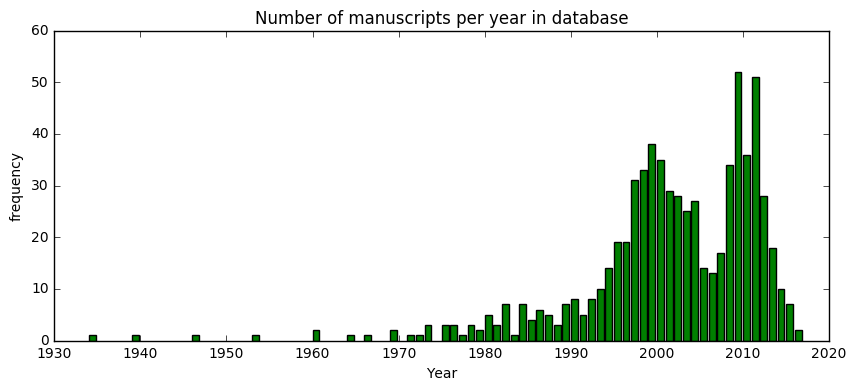

In [63]:
plt.figure(figsize=(10,4))
plt.bar(mwm_year_dist.keys(), mwm_year_dist.values(), color="green")
plt.xlabel("Year")
plt.ylabel("frequency")
plt.title("Number of manuscripts per year in database")
plt.show()

# Sentiment Analysis


In [64]:
from collections import defaultdict

# counter to count the number of lines that have been processed
counter = 0

happyness_rank = defaultdict(float)
path = '/Users/GretarAtli/Documents/GitHub/Dtu/Dtu-SocialGraphs-FinalProject/Data/Data_Set_S1.txt'
with open(path) as f:
    for line in f:
        counter += 1
        
        # we want to skip the first 4 lines of the file
        if counter > 4:
            line = line.split()
            word = line[0]  # get the word from the line
            happiness_average = float(line[2]) # get the word happiness average
            happyness_rank[word] = happiness_average

In [65]:
import numpy as np

from __future__ import division

# Takes in a list of tokens and the happiness_keys which is the list of words in data set 1
# returns the mean value of the happiness rank that was found in the tokens array
# if no value was found then the function returns None
def estimateHappiness(tokens,happiness_keys):
    
    happiness_avg = [] # an array that contains the average happyness values of the tokens
    
    for token in tokens:
        # only include the words that can be found in the data set
        if token in happiness_keys: 
            happiness_avg.append(happyness_rank[token])
            
    # If no word in the tokens array is found in the dataset then we return 0
    if len(happiness_avg) == 0:
        return None
    else : 
        return np.mean(happiness_avg)

In [71]:
filepath_scripts =  "/Users/GretarAtli/Dropbox/SocialGraph/scripts/"


happiness_keys = set(happyness_rank.keys())

# Create a dictionary that is a container for the sensitivity analysis values
happiness_score = defaultdict(float)


counter = 0
for title in manuscripts_intersection:
    title_for_uri = title.replace(" ","-").replace("(","").replace(")","")
    filename = filepath_scripts + title_for_uri + ".txt"
    print (filename)
    f = open(filename,"r")
    
    movie_text_tokens = []
    
    for line in f.readlines():
        # Clean the text by eliminating punctations 
        translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
        line = line.translate(translator)
        
        if not line.isupper():
            line = line.lower() # make the whole line lower case
            #tokenizer = RegexpTokenizer(r'\w+')  # We choose to use regularexpression tokenizer
            #line = tokenizer.tokenize(line) # Get all tokens with the tokenizer
            line = line.split()
            # filter out the stop words 
            #line = [w for w in line if not w in stopwords.words('english')] 

            # We decided to eliminate sentances if it only contains upper case letters. 
            # because we did not want to include the scene headings
            if line:
                #print (line)
                for word in line:
                    movie_text_tokens.append(word)
    
    happiness_score[title] = estimateHappiness(movie_text_tokens,happiness_keys)
    #break
    counter += 1
    print(counter)

/Users/GretarAtli/Dropbox/SocialGraph/scripts/The-Back-Up-Plan.txt
1
/Users/GretarAtli/Dropbox/SocialGraph/scripts/The-Hudsucker-Proxy.txt
2
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Crank.txt
3
/Users/GretarAtli/Dropbox/SocialGraph/scripts/There's-Something-About-Mary.txt
4
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Take-Shelter.txt
5
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Interview-with-the-Vampire.txt
6
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Surrogates.txt
7
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Conan-the-Barbarian.txt
8
/Users/GretarAtli/Dropbox/SocialGraph/scripts/The-Queen.txt
9
/Users/GretarAtli/Dropbox/SocialGraph/scripts/She's-Out-of-My-League.txt
10
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Kundun.txt
11
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Eastern-Promises.txt
12
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Jay-and-Silent-Bob-Strike-Back.txt
13
/Users/GretarAtli/Dropbox/SocialGraph/scripts/Prom-Night.txt
14
/Users/GretarAtli/Dropbox

** Save the result to a file**

In [72]:
result_file_uri = "/Users/GretarAtli/Dropbox/SocialGraph/results/happiness-score.json"

with open(result_file_uri, 'w') as fp:
    json.dump(happiness_score, fp)


## Analysing the result

In [4]:
happiness_score = json.load(open('/Users/GretarAtli/Dropbox/SocialGraph/results/happiness-score.json'))

In [78]:
x

array([ 5.24976002,  5.25263785,  5.25551569,  5.25839353,  5.26127136,
        5.2641492 ,  5.26702704,  5.26990488,  5.27278271,  5.27566055,
        5.27853839,  5.28141623,  5.28429406,  5.2871719 ,  5.29004974,
        5.29292757,  5.29580541,  5.29868325,  5.30156109,  5.30443892,
        5.30731676,  5.3101946 ,  5.31307244,  5.31595027,  5.31882811,
        5.32170595,  5.32458378,  5.32746162,  5.33033946,  5.3332173 ,
        5.33609513,  5.33897297,  5.34185081,  5.34472865,  5.34760648,
        5.35048432,  5.35336216,  5.35623999,  5.35911783,  5.36199567,
        5.36487351,  5.36775134,  5.37062918,  5.37350702,  5.37638485,
        5.37926269,  5.38214053,  5.38501837,  5.3878962 ,  5.39077404,
        5.39365188,  5.39652972,  5.39940755,  5.40228539,  5.40516323,
        5.40804106,  5.4109189 ,  5.41379674,  5.41667458,  5.41955241,
        5.42243025,  5.42530809,  5.42818593,  5.43106376,  5.4339416 ,
        5.43681944,  5.43969727,  5.44257511,  5.44545295,  5.44

In [79]:
y, x = np.histogram(list(happiness_score.values()),100)

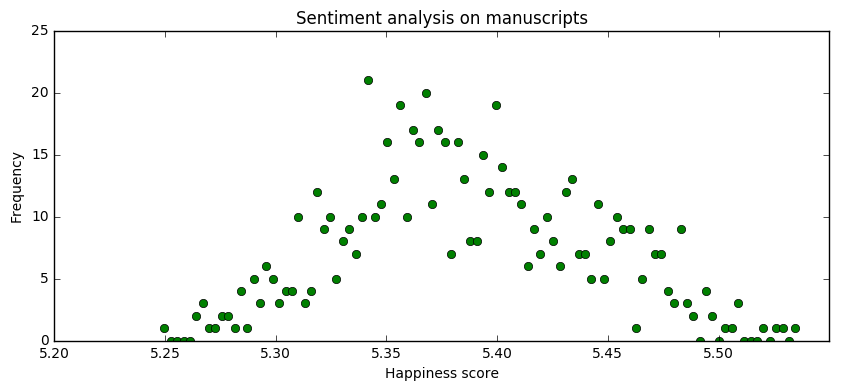

In [80]:
plt.figure(figsize=(10,4))
plt.plot(x[0:-1], y, 'o', color="green",)
plt.title("Sentiment analysis on manuscripts")
plt.ylabel("Frequency")
plt.xlabel("Happiness score")
plt.show()

**The max happiness outliers**

In [84]:
sorted(happiness_score.items(), key=operator.itemgetter(1), reverse=True)

[('Mary Poppins', 5.5375437410828265),
 ('Boyhood', 5.5302569470879339),
 ('Bridesmaids', 5.5273493198063184),
 ('Her', 5.5222323830016142),
 ('The Family Man', 5.510250174337517),
 ('Napoleon Dynamite', 5.5102322580645167),
 ('Precious', 5.5094355974433977),
 ('The Perks of Being a Wallflower', 5.5081589769590442),
 ('Rachel Getting Married', 5.5038666222074033),
 ("It's Complicated", 5.4989186052936949),
 ('Midnight in Paris', 5.4984167509268627),
 ('Clueless', 5.4970538192889764),
 ('Lost in Translation', 5.4964149630274033),
 ('Big', 5.4956480721903205),
 ('Peggy Sue Got Married', 5.4945432761430073),
 ('Juno', 5.4897954032150924),
 ('Annie Hall', 5.4889019719687102),
 ('Saving Mr. Banks', 5.4881495444549175),
 ('Celeste & Jesse Forever', 5.4873324445521758),
 ('Notting Hill', 5.4868291689299298),
 ('Kate & Leopold', 5.4856344498720642),
 ('Almost Famous', 5.4856064118050334),
 ('The Sessions', 5.484791410203802),
 ('Jerry Maguire', 5.4841708370760083),
 ('The Apartment', 5.4841468

** The min happiness outliers**

In [47]:
[(key,value) for key, value in happiness_score.items() if value < 5.0]

[('Top Gun', 4.9950000000000001)]

In [55]:
sorted(tmdb_5000_movies.keys())[:-4000]

['#Horror',
 '(500) Days of Summer',
 '10 Cloverfield Lane',
 '10 Days in a Madhouse',
 '10 Things I Hate About You',
 '102 Dalmatians',
 '10th & Wolf',
 '11:14',
 '12 Angry Men',
 '12 Rounds',
 '12 Years a Slave',
 '127 Hours',
 '13 Going on 30',
 '13 Hours: The Secret Soldiers of Benghazi',
 '1408',
 '15 Minutes',
 '16 Blocks',
 '16 to Life',
 '17 Again',
 '1776',
 '1911',
 '1941',
 '1982',
 '2 Fast 2 Furious',
 '2 Guns',
 '20 Dates',
 '20 Feet from Stardom',
 '20,000 Leagues Under the Sea',
 '200 Cigarettes',
 '2001: A Space Odyssey',
 '2012',
 "2016: Obama's America",
 '2046',
 '21',
 '21 & Over',
 '21 Grams',
 '21 Jump Street',
 '22 Jump Street',
 '24 7: Twenty Four Seven',
 '25th Hour',
 '27 Dresses',
 '28 Days',
 '28 Days Later',
 '28 Weeks Later',
 '2:13',
 '3 Backyards',
 '3 Days to Kill',
 '3 Ninjas Kick Back',
 '3 Strikes',
 '30 Days of Night',
 '30 Minutes or Less',
 '30 Nights of Paranormal Activity With the Devil Inside the Girl With the Dragon Tattoo',
 '300',
 '3000 Mil